# Sales Details Project :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
data = pd.read_csv("C:/Users/landa/Downloads/Sales Data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
## Check for missing values :-

data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [4]:
## Info :-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
## Droping unwaanted data :-
data = data.drop("Unnamed: 0",axis=1)

In [6]:
data.columns  ## data.columns() :--> Here the brackets gives the error

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [7]:
## Finding the highest salling product :-

Product_sales = data.groupby("Product")["Quantity Ordered"].sum()
Product_sales

## Sorting the above result using sort_values(ascending=T/F)
Product_sales_sorted = Product_sales.sort_values(ascending=False)
Product_sales_sorted                    
## Get the Top-5 selling products

Product_sales_sorted.head()   # To display only Top-3 products pass parameter in .head(3)


Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

##### Observation :

The Product "AAA Batteries (4-pack)" is the highest selling product and 
followed by AA Battereies (4-pack), USB-C Charging Cable, Lignhning Charging Cable and Wired Headphones.

In [8]:
# Group the data by "Product" and sum up the quantities ordered
product_sales = data.groupby("Product")["Quantity Ordered"].sum()

# Find the product with the highest total quantity ordered
max_product = product_sales.idxmax()

# Display the result
print("The product sold the most is:", max_product)


The product sold the most is: AAA Batteries (4-pack)


In [9]:
## Top City by sales:-

city_sales = data.groupby("City")["Sales"].sum()

city_sales_sorted = city_sales.sort_values(ascending=False)
city_sales_sorted

## Top-5 cities by sales :
city_sales_sorted.head()


City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
Name: Sales, dtype: float64

##### Observation:

The "San Francisco" has the highest sale of 8,26,2,203 USD.

In [10]:
## Which City has max orders : 

Max_order_city = data.groupby('City')['Quantity Ordered'].sum()
Max_order_city

## Sorting the by vlaues :
Max_order_city.sort_values(ascending=False)

City
 San Francisco    50239
 Los Angeles      33289
 New York City    27932
 Boston           22528
 Dallas           16730
 Atlanta          16602
 Seattle          16553
 Portland         14053
 Austin           11153
Name: Quantity Ordered, dtype: int64

In [16]:
# Maximum number of Orders by city : 

max_order_city = data.groupby("City")["City"].count()
max_order_city

sorted_values = max_order_city.sort_values(ascending=False)
sorted_values

City
 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

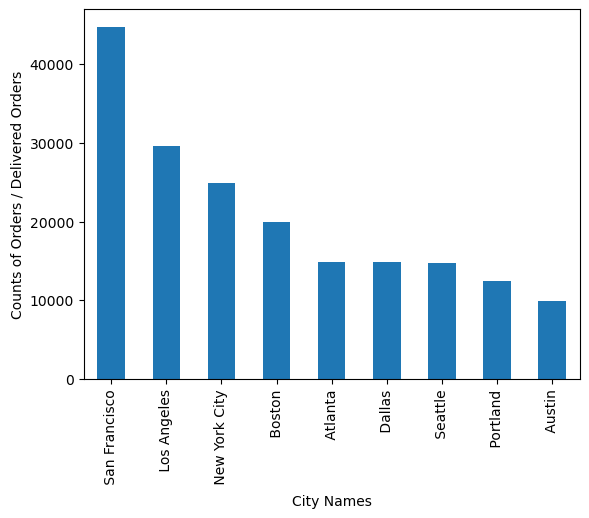

In [17]:
## Visualizing : 

data.groupby("City")["City"].count().sort_values(ascending=False).plot.bar()

plt.xlabel("City Names")
plt.ylabel("Counts of Orders / Delivered Orders")
plt.show()

Observations :

    "San Francisco" has maximum number of orders and followed by Los Angeles, New York City, ...

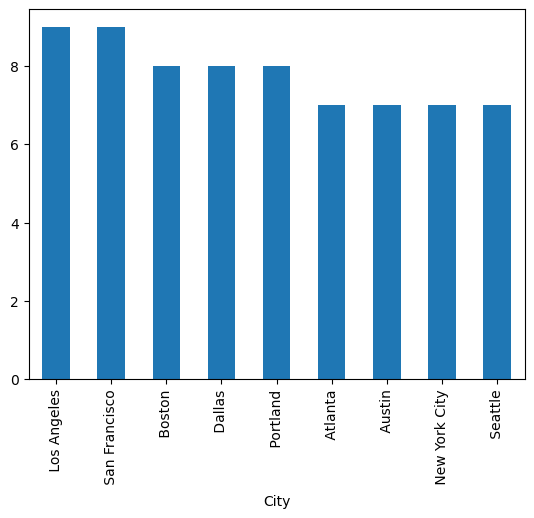

In [18]:
Max_order_city = data.groupby('City')['Quantity Ordered'].max()

data.groupby('City')['Quantity Ordered'].max().sort_values(ascending=False).plot.bar()

plt.show()

In [19]:
## Which Month has max sales :

Max_sales_by_month = data.groupby("Month")["Sales"].sum()
Max_sales_by_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [26]:
## Converting month to month_name: 

Month_name = {1:"January",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"Novmber",12:"Decmber"}
#data["Month_Name"] = data["Month"].replace(Month_name) # It also do the same process 


data["Month_Name"] = data["Month"].map(Month_name) ## map() function is used to apply to all the rows of dataset.

data["Month_Name"]

0         Decmber
1         Decmber
2         Decmber
3         Decmber
4         Decmber
           ...   
185945       June
185946       June
185947       June
185948       June
185949       June
Name: Month_Name, Length: 185950, dtype: object

### Max number of orders by month :

In [25]:


max_orders = data.groupby("Month_Name")['Quantity Ordered'].sum()
max_orders

max_orders_sorted = max_orders.sort_values(ascending=False)
max_orders_sorted

print("Observations:")

print(end = "\n")
print("The Max Orders are placed in the month:" ,max_orders_sorted)

Observations:

The Max Orders are placed in the month: Month_Name
Decmber      28114
October      22703
April        20558
Novmber      19798
May          18667
March        17005
July         16072
June         15253
Feb          13449
August       13448
September    13109
January      10903
Name: Quantity Ordered, dtype: int64


In [27]:
Max_sales_by_month = data.groupby("Month_Name")["Sales"].sum()
Max_sales_by_month

# sort the result 
Max_sales_by_month_sorted = Max_sales_by_month.sort_values(ascending=False)

print("Observation:")
print(end="\n")
print("The Top-3 Month by sales are :",Max_sales_by_month_sorted.head(3))

Observation:

The Top-3 Month by sales are : Month_Name
Decmber    4613443.34
October    3736726.88
April      3390670.24
Name: Sales, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Decmber'),
  Text(1, 0, 'October'),
  Text(2, 0, 'April'),
  Text(3, 0, 'Novmber'),
  Text(4, 0, 'May'),
  Text(5, 0, 'March'),
  Text(6, 0, 'July'),
  Text(7, 0, 'June'),
  Text(8, 0, 'August'),
  Text(9, 0, 'Feb'),
  Text(10, 0, 'September'),
  Text(11, 0, 'January')])

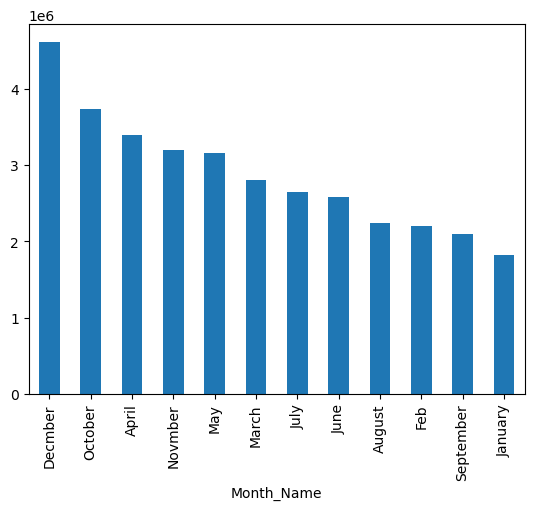

In [28]:
data.groupby("Month_Name")["Sales"].sum().sort_values(ascending=False).plot.bar()
plt.xticks(rotation = 'vertical')

#### Top selling products by Month:

In [29]:
max_orders = data.groupby(["Month_Name","Product"])['Quantity Ordered'].sum()
max_orders.sort_values(ascending=False).head(20)

Month_Name  Product                 
Decmber     AAA Batteries (4-pack)      4241
            AA Batteries (4-pack)       3724
October     AAA Batteries (4-pack)      3363
Decmber     USB-C Charging Cable        3250
            Lightning Charging Cable    3087
Novmber     AAA Batteries (4-pack)      3025
October     AA Batteries (4-pack)       2940
April       AAA Batteries (4-pack)      2939
May         AAA Batteries (4-pack)      2927
April       AA Batteries (4-pack)       2821
Decmber     Wired Headphones            2749
October     USB-C Charging Cable        2667
Novmber     AA Batteries (4-pack)       2625
October     Lightning Charging Cable    2572
March       AAA Batteries (4-pack)      2479
May         AA Batteries (4-pack)       2384
April       Lightning Charging Cable    2373
July        AAA Batteries (4-pack)      2365
October     Wired Headphones            2274
April       USB-C Charging Cable        2269
Name: Quantity Ordered, dtype: int64

## Observations : 
    
    The most selling porducts in EACH Month is "AAA Batteries (4-pack)"

### Analysing the Price :

In [30]:
##Analysing the price by each products:
price_of_each_product = data.groupby("Product")["Price Each"].sum()
price_of_each_product

##Sorting the vlaues 
price_of_each_product_sorted = data.groupby("Product")["Price Each"].sum()
price_of_each_product_sorted.sort_values(ascending=False)

Product
Macbook Pro Laptop            8030800.00
iPhone                        4789400.00
ThinkPad Laptop               4127958.72
Google Phone                  3315000.00
27in 4K Gaming Monitor        2429637.70
34in Ultrawide Monitor        2348718.19
Apple Airpods Headphones      2332350.00
Flatscreen TV                 1440000.00
Bose SoundSport Headphones    1332366.75
27in FHD Monitor              1125974.93
Vareebadd Phone                826000.00
20in Monitor                   451068.99
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       323787.10
USB-C Charging Cable           261740.85
Wired Headphones               226395.18
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Name: Price Each, dtype: float64

<Axes: xlabel='Product'>

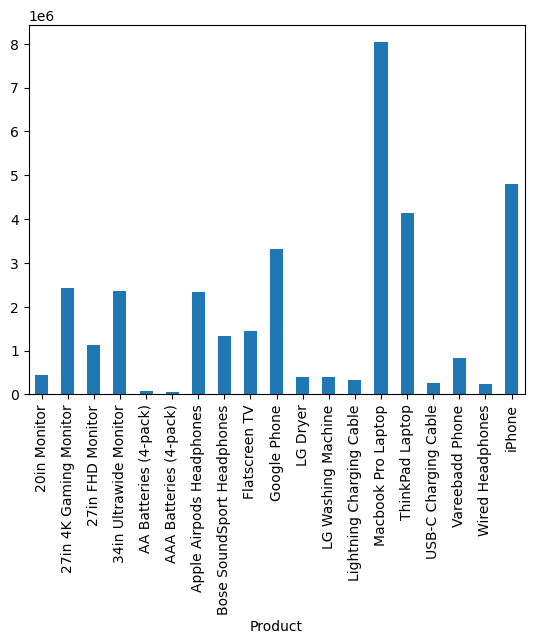

In [31]:
data.groupby("Product")["Price Each"].sum().plot(kind="bar")

### Observation:
    
    The Product having max price is  "Macbook Pro Laptop" is 8030800 
    
    The Product having least price is "AAA Batteries (4-pack)" is 61716 

### What time should we display advertisements to maximise for product purchase ?

In [16]:
keys=[]
hour=[]
for key,hour_df in data.groupby("Hour"):
    keys.append(key)
    hour.append(len(hour_df))

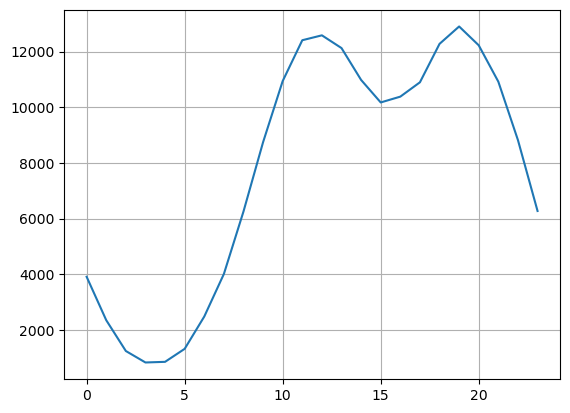

In [18]:
plt.grid()
plt.plot(keys,hour)

### Observation:

    The time between 12 pm and 7 pm is probably the best time to advertise to maximise product pruchase 

In [35]:
## The Average of the Each Product:

data.groupby("Product")["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


The Top selling products "AAA Batteries (4-pack)". The top selling products seem to have a correlation with the price of the product. The cheaper the 
product higher the ordered quantity and vice versa.